## Load library

In [31]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from unidecode import unidecode
from datetime import datetime
import time
import pandas as pd
import numpy as np
from dateparser.calendars.jalali import JalaliCalendar

##  Launch www.Time.ir

In [34]:
driver = webdriver.Chrome('C:\\Python27\\chromedriver.exe')
driver.get('https://www.time.ir/');


## Go to 1395/01/01

In [1]:
def goToFirstDate(driver):
    [_, year] = driver.find_elements_by_class_name('ctl00_cphTop_Sampa_Web_View_EventUI'
                                                       '_EventCalendarSimple30cphTop_3732_ecEventCalendar')
    year.click()
    time.sleep(0.5)
    year = driver.find_element_by_id('ctl00_cphTop_Sampa_Web_View_EventUI'
                                      '_EventCalendarSimple30cphTop_3732_ecEventCalendar_txtYearSelected')
    year.send_keys(1395)
    year.send_keys(Keys.ENTER)
    time.sleep(2)
    [month, _] = driver.find_elements_by_class_name('ctl00_cphTop_Sampa_Web_View_EventUI'
                                                   '_EventCalendarSimple30cphTop_3732_ecEventCalendar')
    month.click()
    time.sleep(0.5)
    month = driver.find_element_by_id('ctl00_cphTop_Sampa_Web_View_EventUI'
                                       '_EventCalendarSimple30cphTop_3732_ecEventCalendar_pnlMonthPicker')
    month.find_element_by_id('1').click()

In [ ]:
goToFirstDate(driver)

## Extract holidays from calender

In [ ]:
df = pd.DataFrame(columns=['year' , 'month' , 'holiday'])
time.sleep(2)
for y in [1395]:
    for i in range(1,13):
        hdays , hmonths , hyears = getHoliday(driver , i , y)
        df_temp = pd.DataFrame(columns=['year' , 'month' , 'holiday'])
        df_temp['holiday'] = hdays
        df_temp['month'] = hmonths
        df_temp['year'] = hyears
        df = df.append(df_temp, ignore_index=True)
        time.sleep(3)
        netx_month = driver.find_element_by_id('ctl00_cphTop_Sampa_Web_View_EventUI'
                                                '_EventCalendarSimple30cphTop_3732_ecEventCalendar_pnlNext')
        netx_month.click()
        time.sleep(3)

In [ ]:
def getHoliday(driver , month , year):
    result_day=[]
    result_month=[]
    result_year=[]
    holiday = driver.find_element_by_class_name('list-unstyled')
    for child in holiday.find_elements_by_tag_name("li"):
        if(child.get_attribute("class")=='eventHoliday'):
            result_day.append(unidecode(child.text.split(' ')[0]))`
            result_month.append(month)
            result_year.append(year)
    return result_day , result_month , result_year

## Extract Name of Days 

In [8]:
df = []
week_days = ['Saturday' , 'Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday']
res = retrive_data(driver , 1 , 1 , 1395)
indicator = week_days.index(res)
#print(indicator)
for y in range(1395,1398):
    for m in range(1,13):
        for d in range(1,31):
            if((y==1396 or y==1397) and (m==12) and (d==30)):
                pass
            else:
                daysOfWeek = week_days[indicator]
                df.append([daysOfWeek , str(y) , str(m) , str(d)])
                indicator = (indicator+1)%7

        if (m <= 6):
            daysOfWeek = week_days[indicator]
            df.append([daysOfWeek, str(y) , str(m) , str(d)])
            indicator = (indicator + 1) % 7

print(df)

[['Sunday', '1395', '1', '1'], ['Monday', '1395', '1', '2'], ['Tuesday', '1395', '1', '3'], ['Wednesday', '1395', '1', '4'], ['Thursday', '1395', '1', '5'], ['Friday', '1395', '1', '6'], ['Saturday', '1395', '1', '7'], ['Sunday', '1395', '1', '8'], ['Monday', '1395', '1', '9'], ['Tuesday', '1395', '1', '10'], ['Wednesday', '1395', '1', '11'], ['Thursday', '1395', '1', '12'], ['Friday', '1395', '1', '13'], ['Saturday', '1395', '1', '14'], ['Sunday', '1395', '1', '15'], ['Monday', '1395', '1', '16'], ['Tuesday', '1395', '1', '17'], ['Wednesday', '1395', '1', '18'], ['Thursday', '1395', '1', '19'], ['Friday', '1395', '1', '20'], ['Saturday', '1395', '1', '21'], ['Sunday', '1395', '1', '22'], ['Monday', '1395', '1', '23'], ['Tuesday', '1395', '1', '24'], ['Wednesday', '1395', '1', '25'], ['Thursday', '1395', '1', '26'], ['Friday', '1395', '1', '27'], ['Saturday', '1395', '1', '28'], ['Sunday', '1395', '1', '29'], ['Monday', '1395', '1', '30'], ['Tuesday', '1395', '1', '30'], ['Wednesday', 

In [9]:
df = pd.DataFrame(df, columns=['dayOfWeek' , 'year' , 'month' , 'day'])
#df.to_csv('weekdays.csv')

In [4]:
def checkAlert(driver):
    # return True if alarm exist
    try:
        item = driver.find_elements_by_class_name('alert-danger')
    except NoSuchElementException:
        return True
    return False

In [3]:
def retrive_data(driver , day , month , year):

    select_day = Select(driver.find_element_by_id('ctl00_cphMiddle_Sampa_Web_View_TimeUI'
                                                  '_DateConvert00cphMiddle_3733_ddlDay'))
    select_day.select_by_visible_text(str(day))

    select_month = Select(driver.find_element_by_id('ctl00_cphMiddle_Sampa_Web_View_TimeUI'
                                                    '_DateConvert00cphMiddle_3733_ddlMonth'))
    select_month.select_by_value(str(month))


    select_year = driver.find_element_by_name('ctl00$cphMiddle$Sampa_Web_View_TimeUI'
                                               '_DateConvert00cphMiddle_3733$txtYear')
    select_year.clear()
    select_year.send_keys(year)

    convert_btn = driver.find_element_by_name('ctl00$cphMiddle$Sampa_Web_View_TimeUI'
                                               '_DateConvert00cphMiddle_3733$btnConvert')
    convert_btn.click()
    time.sleep(2)
    if(checkAlert(driver)):
        driver.quit()
        return 'Alert'
    else:

        res = driver.find_element_by_id('ctl00_cphMiddle_Sampa_Web_View_TimeUI'
                                        '_DateConvert00cphMiddle_3733_lblSecondDate')
        res = res.text.split(',')

        driver.quit()
        return res[0]


## Get important features for this job

In [ ]:
! unzip data.zip -d .

In [14]:
df1 = pd.read_csv('data.csv')

In [15]:
#df1.drop_duplicates(subset =['G_Log_Date', 'FROM', 'TO'], 
#                     keep = 'first', inplace = True) 
grouped = df1.groupby(['Log_Date', 'FROM', 'TO'], as_index=False).count()
#Log_Date = [i[0] for i in grouped]
#From = [i[1] for i in grouped]
#To = [i[2] for i in grouped]
d = {'Log_Date': grouped['Log_Date'], 'FROM': grouped['FROM'], 'TO': grouped['TO'], 'Count': grouped['Log_Time']}
df_new = pd.DataFrame(data=d)
df_new = df_new[['Log_Date','FROM','TO','Count']]

In [16]:
df_new

,Log_Date,FROM,TO,Count
0,1395/01/02,3.0,30.0,3
1,1395/01/02,3.0,49.0,1
2,1395/01/02,3.0,66.0,3
3,1395/01/02,3.0,70.0,9
4,1395/01/02,6.0,49.0,3
5,1395/01/02,6.0,70.0,4
6,1395/01/02,8.0,70.0,3
7,1395/01/02,10.0,11.0,6
8,1395/01/02,10.0,15.0,1
9,1395/01/02,10.0,30.0,11


## Put Name of days in dataframe

In [18]:
daysOfWeek = []
for index, row in df.iterrows():
    if(len(str(row['month']))==1):
        m = '0'+ str(row['month'])
    else:
        m = str(row['month'])
    if(len(str(row['day']))==1):
        hd = '0'+ str(row['day'])
    else:
        hd = str(row['day'])
    day = str(row['year'])+ m + hd
    daysOfWeek.append([day , row['dayOfWeek']])
# tempDf = pd.DataFrame(daysOfWeek , columns=['date' , 'day'])

df_new['Log_Date'] = df_new['Log_Date'].astype(str)

df_new['day_of_week'] = [getDay(i,daysOfWeek) for i in df_new['Log_Date']]

In [20]:
df1 = df_new
df1.to_csv('data(add_dayofweek).csv')

In [17]:
def getDay(date , dayofWeek):
    index = 0
    day = int(date[-2:])
    month= int(date[-5:-3])-1
    year = int(date[:4])-1395
    if(month>6):
        index = 6*31 + (month-6)*30
    else:
        index = month*31
    index = index + day
    if(year==1):
        index += 366
    if(year>1):
        index += 365 + 366
    else:
        index += 0
    return dayofWeek[index-1][1]

In [21]:
df1.head()

,Log_Date,FROM,TO,Count,day_of_week
0,1395/01/02,3.0,30.0,3,Monday
1,1395/01/02,3.0,49.0,1,Monday
2,1395/01/02,3.0,66.0,3,Monday
3,1395/01/02,3.0,70.0,9,Monday
4,1395/01/02,6.0,49.0,3,Monday


## Assign Holiday to dataframe
### 1 as holiday & 0 as other

In [22]:
df2 = pd.read_csv('holidays.csv')
df3 = pd.read_csv('data(add_dayofweek).csv')

In [23]:
############ Insert Holidays into dataset
hdays = []
for index, row in df2.iterrows():
    if(len(str(row['month']))==1):
        m = '0'+ str(row['month'])
    else:
        m = str(row['month'])
    if(len(str(row['holiday']))==1):
        hd = '0'+ str(row['holiday'])
    else:
        hd = str(row['holiday'])
    hday = str(row['year'])+ m + hd
    hdays.append(hday)
# # print(hdays)
df3['Holiday'] = 0
df3['Log_Date1'] = [i.replace('/', '') for i in df3['Log_Date']]
#

# # # print()
for hday in hdays:
    df3.loc[df3['Log_Date1']==hday , 'Holiday'] = 1
    # df1.query("Departure_Date == '{0}'".format(hday))
df3.drop(['Log_Date1'], axis=1, inplace=True) 
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
df3 = df3.reset_index(drop=True)
df3.to_csv('data(add_holiday).csv')

############ Insert Holidays into dataset

In [24]:
############# Set Thursday and Friday as holiday
df3.loc[df3['day_of_week'].isin(['Thursday' , 'Friday']) , 'Holiday'] = 1
df3.to_csv('data_weekend_holiday.csv')

In [ ]:
##################### Check Day
for index, row in df1.iterrows():
    time = int((str(row['Log_Date']).split('/')[-1]))
    if(time>31):
        print(time)
print('done')
##################### Check Month
for index, row in df1.iterrows():
    time = int((str(row['Log_Date']).split('/')[1]))
    if(time>12 or time==0):
        print(time)
print('done')

#################### Check Year
for index, row in df1.iterrows():
    time = int((str(row['Log_Date']).split('/')[0]))
    if(time!= 1396 and time!= 1395 and time!=1397):
        print(time)
print('done')

#df1 = df1.sort_values(by=['Departure_Date'])
#for date_ in df1['Log_Date']:
#    print(date_)


In [26]:
#df3 = pd.read_csv('data_weekend_holiday.csv')

## Convert persian date to Gregorian date

In [39]:
df3['G_Log_Date'] = [JalaliCalendar(x).get_date()['date_obj'].date() for x in df3['Log_Date']]
#df3['G_Departure_Date'] = [JalaliCalendar(x).get_date()['date_obj'].date() for x in df3['Departure_Date']]

In [40]:
df3.to_csv('data(add_Gregorian_date).csv')

## Add number of day

In [27]:
df3['day_of_month'] = [int(x[-2:]) for x in df3['Log_Date']]
#day = int(date[-2:])

In [41]:
df3.head()

,Log_Date,FROM,TO,Count,day_of_week,Holiday,day_of_month,day_of_week(N),month_of_year,G_Log_Date
0,1395/01/02,3.0,30.0,3,Monday,1,2,3,1,2016-03-21
1,1395/01/02,3.0,49.0,1,Monday,1,2,3,1,2016-03-21
2,1395/01/02,3.0,66.0,3,Monday,1,2,3,1,2016-03-21
3,1395/01/02,3.0,70.0,9,Monday,1,2,3,1,2016-03-21
4,1395/01/02,6.0,49.0,3,Monday,1,2,3,1,2016-03-21


In [29]:
#df3.to_csv('data(add_dayofmonth).csv')

## Add number of day_of_week

In [30]:
daysofweek = {'Saturday':1 , 'Sunday':2 , 'Monday':3 , 'Tuesday':4 , 'Wednesday':5 , 'Thursday':6 , 'Friday':7}
df3['day_of_week(N)'] = [daysofweek[item] for item in df3['day_of_week']] 

In [31]:
df3.to_csv('data(add_dayofweek(N)).csv')

In [30]:
#df3 = pd.read_csv('data(add_dayofweek(N)).csv')

In [37]:
df3.head()

,Log_Date,FROM,TO,Count,day_of_week,Holiday,day_of_month,day_of_week(N),month_of_year
0,1395/01/02,3.0,30.0,3,Monday,1,2,3,1
1,1395/01/02,3.0,49.0,1,Monday,1,2,3,1
2,1395/01/02,3.0,66.0,3,Monday,1,2,3,1
3,1395/01/02,3.0,70.0,9,Monday,1,2,3,1
4,1395/01/02,6.0,49.0,3,Monday,1,2,3,1


## Add number of month_of_year

In [34]:
df3['month_of_year'] = [int(x[-5:-3]) for x in df3['Log_Date']]

In [ ]:
df3.drop(['Unnamed: 0'], axis=1, inplace=True)
#df3.drop(['Unnamed: 0.1'], axis=1, inplace=True)


In [38]:
df3.to_csv('data(add_MonthOfYear).csv')

In [ ]:
#df3 = df3.sort_values(by=['Log_Date', 'FROM', 'TO'])
#df3 = df3.reset_index(drop=True)
#df3

In [36]:
#df3.to_csv('data(add_SoreData).csv')

In [44]:
#df3 = pd.read_csv('data(add_SoreData).csv')
type(df3['G_Log_Date'][0])

datetime.date

In [45]:
from datetime import timedelta
today = df3['G_Log_Date'][0] #datetime.strptime(df3['G_Log_Date'][0], '%Y-%m-%d').date()
tomorrow = today + timedelta(days=1)
tomorrow.strftime('%Y-%m-%d')

'2016-03-22'

## Add future_holiday_num features to dataframe

In [84]:
df4=df3.copy(deep=True)

In [106]:
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-20', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 4


In [119]:
df4['Future_Holiday_NUM(7)'] = 2
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-20', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 4
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-19', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 5
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-18', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 5
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-17', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 5
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-16', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 4
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-15', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 4
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-14', '%Y-%m-%d').date(), 'Future_Holiday_NUM(7)'] = 3




In [120]:
for i in range(dif_date.days-7):
    k=0
    today = df4['G_Log_Date'][0] + timedelta(days=i)# datetime.strptime(df4['G_Log_Date'][i], '%Y-%m-%d').date()
    for j in range(1,8):
        future_day = today + timedelta(days=j)
        #print(future_day)
        filter1 = df4['G_Log_Date'] == future_day#.strftime('%Y-%m-%d')
        
        #print(filter1)
        filter2 = df4['Holiday'] == 1
        #print(filter2)
        df5 = df4[filter1 & filter2]
        #print(df5)
        if df5.empty == False:
            k+=1
    #print( df4['G_Log_Date'][i], k)
    df4.loc[df4.G_Log_Date == today, 'Future_Holiday_NUM(7)'] = k 
     
    
            

In [127]:
df4['Future_Holiday_NUM(14)'] = 4
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-20', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 9
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-19', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 10
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-18', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 9
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-17', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 8
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-16', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-15', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-14', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-13', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-12', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-11', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-10', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 7
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-09', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 6
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-08', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 6
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-07', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 6
df4.loc[df4.G_Log_Date == datetime.strptime('2018-03-06', '%Y-%m-%d').date(), 'Future_Holiday_NUM(14)'] = 5

In [128]:
for i in range(dif_date.days-14):
    k=0
    today = df4['G_Log_Date'][0] + timedelta(days=i)# datetime.strptime(df4['G_Log_Date'][i], '%Y-%m-%d').date()
    for j in range(1,15):
        future_day = today + timedelta(days=j)
        #print(future_day)
        filter1 = df4['G_Log_Date'] == future_day#.strftime('%Y-%m-%d')
        
        #print(filter1)
        filter2 = df4['Holiday'] == 1
        #print(filter2)
        df5 = df4[filter1 & filter2]
        #print(df5)
        if df5.empty == False:
            k+=1
    #print( df4['G_Log_Date'][i], k)
    df4.loc[df4.G_Log_Date == today, 'Future_Holiday_NUM(14)'] = k 
     

In [135]:
#df4.drop('',axis=1,  inplace=True)
#df4.to_csv('data(add_futures_holiday).csv')
df5 = df4.copy(deep=True)

In [35]:
#df5.drop(['day_of_week','G_Log_Date'],axis=1,  inplace=True)
df5.head()

,Log_Date,FROM,TO,Count,Holiday,day_of_month,day_of_week(N),month_of_year,Future_Holiday_NUM(7),Future_Holiday_NUM(14),...,46th_Dest,47th_Dest,48th_Dest,49th_Dest,50th_Dest,51th_Dest,52th_Dest,53th_Dest,54th_Dest,55th_Dest
0,1395/01/02,3.0,30.0,3,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
1,1395/01/02,3.0,49.0,1,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
2,1395/01/02,3.0,66.0,3,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
3,1395/01/02,3.0,70.0,9,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
4,1395/01/02,6.0,49.0,3,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0


## Query on dataframe to convert data to time series data

In [39]:
df6 = df5.copy(deep=True)

In [40]:
#df7.groupby(['Log_Date', 'Holiday', 'day_of_month', 'day_of_week(N)',
#             'month_of_year','Future_Holiday_NUM(7)','Future_Holiday_NUM(14)'], as_index=False)['Count'].sum()
filter1 = df6['TO']==70.0
filter2 = df6['FROM']==49.0
df7 = df6[filter1 & filter2]
#df7.to_csv('count_per_day_49')

In [46]:
df7.head()

,Log_Date,Count,Holiday,day_of_month,day_of_week(N),month_of_year,Future_Holiday_NUM(7),Future_Holiday_NUM(14)
52,1395/01/02,44,1,2,3,1,4,6
153,1395/01/03,38,1,3,4,1,3,5
269,1395/01/04,49,1,4,5,1,2,4
371,1395/01/05,81,1,5,6,1,2,4
470,1395/01/06,40,1,6,7,1,2,4


In [45]:
#df7.groupby(['TO', 'FROM']).count()
df7.drop(['Unnamed: 0'],axis=1, inplace=True)


C:\Users\Reza-b\Anaconda3\envs\python35\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


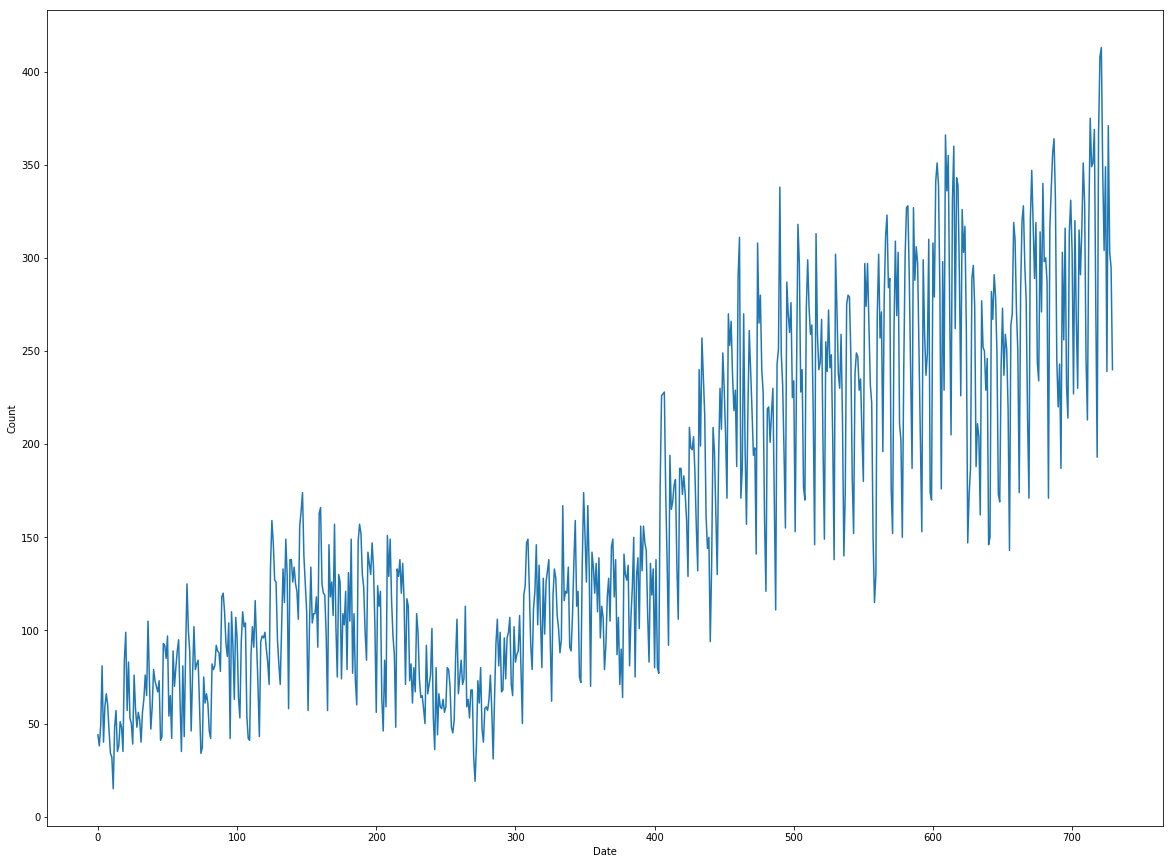

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 15))
plt.plot(range(len(df7['Log_Date'])),df7['Count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

## After convert data to one_hot we will have our final data as data(one_hot).csv file

In [5]:
df5 = pd.read_csv('data(one_hot).csv')

In [7]:
df5.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Log_Date,FROM,TO,Count,Holiday,...,46th_Dest,47th_Dest,48th_Dest,49th_Dest,50th_Dest,51th_Dest,52th_Dest,53th_Dest,54th_Dest,55th_Dest
0,0,0,0,0,0,1395/01/02,3.0,30.0,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1395/01/02,3.0,49.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,2,2,1395/01/02,3.0,66.0,3,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,3,1395/01/02,3.0,70.0,9,1,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,4,4,1395/01/02,6.0,49.0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df6 = df5.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'],axis=1,inplace=True )

In [16]:
df5.head()

,Log_Date,FROM,TO,Count,Holiday,day_of_month,day_of_week(N),month_of_year,Future_Holiday_NUM(7),Future_Holiday_NUM(14),...,46th_Dest,47th_Dest,48th_Dest,49th_Dest,50th_Dest,51th_Dest,52th_Dest,53th_Dest,54th_Dest,55th_Dest
0,1395/01/02,3.0,30.0,3,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
1,1395/01/02,3.0,49.0,1,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
2,1395/01/02,3.0,66.0,3,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
3,1395/01/02,3.0,70.0,9,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
4,1395/01/02,6.0,49.0,3,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0


In [18]:
filter1 = df5['TO']==70.0
filter2 = df5['FROM']==49.0
df7 = df5[filter1 & filter2]

 ## Final Data(finally we can drop FROM and TO features)

In [19]:
df7.head()

,Log_Date,FROM,TO,Count,Holiday,day_of_month,day_of_week(N),month_of_year,Future_Holiday_NUM(7),Future_Holiday_NUM(14),...,46th_Dest,47th_Dest,48th_Dest,49th_Dest,50th_Dest,51th_Dest,52th_Dest,53th_Dest,54th_Dest,55th_Dest
52,1395/01/02,49.0,70.0,44,1,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0
153,1395/01/03,49.0,70.0,38,1,3,4,1,3,5,...,0,0,0,0,0,0,0,0,0,0
269,1395/01/04,49.0,70.0,49,1,4,5,1,2,4,...,0,0,0,0,0,0,0,0,0,0
371,1395/01/05,49.0,70.0,81,1,5,6,1,2,4,...,0,0,0,0,0,0,0,0,0,0
470,1395/01/06,49.0,70.0,40,1,6,7,1,2,4,...,0,0,0,0,0,0,0,0,0,0
